<a href="https://colab.research.google.com/github/Faham1111/Faham1111/blob/main/Task_01_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ All packages imported successfully!
📊 Generating synthetic house data for demonstration...
✅ Generated synthetic dataset!
Dataset shape: (2000, 4)

First few rows:
   GrLivArea  BedroomAbvGr  TotalBathrooms  SalePrice
0       2298             3             2.5     392080
1       1917             2             3.0     317441
2       2388             3             3.5     422093
3       2913             2             1.0     398165
4       1859             4             1.5     346301

EXPLORATORY DATA ANALYSIS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GrLivArea       2000 non-null   int64  
 1   BedroomAbvGr    2000 non-null   int64  
 2   TotalBathrooms  2000 non-null   float64
 3   SalePrice       2000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 62.6 KB
None

Basic Statistics:
        GrLivArea


Correlation Matrix:
                GrLivArea  BedroomAbvGr  TotalBathrooms  SalePrice
GrLivArea        1.000000      0.033258       -0.000891   0.930977
BedroomAbvGr     0.033258      1.000000        0.022605   0.257062
TotalBathrooms  -0.000891      0.022605        1.000000   0.104926
SalePrice        0.930977      0.257062        0.104926   1.000000


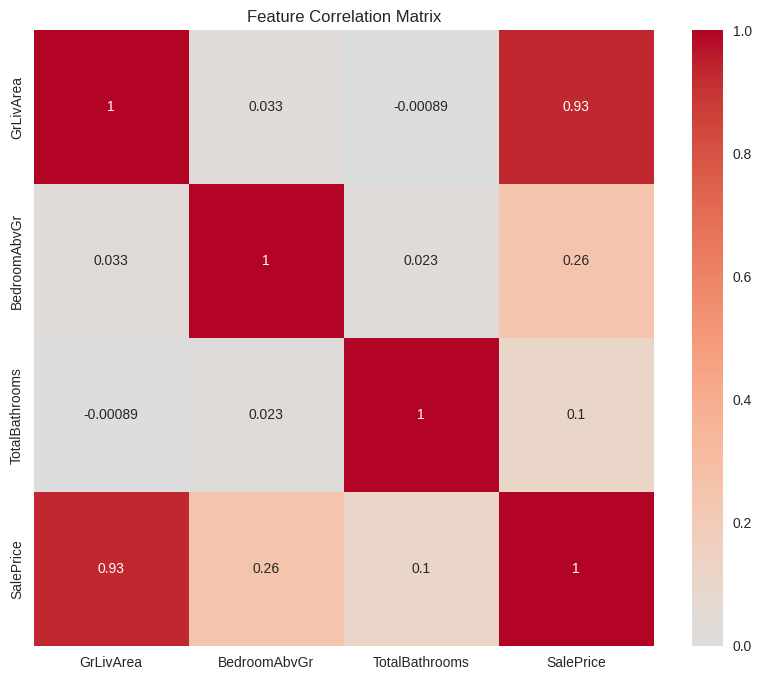


DATA PREPROCESSING
Removed 18 outliers (0.9%)

Final dataset shape: (1982, 3)
Features:
  X1: GrLivArea
  X2: BedroomAbvGr
  X3: TotalBathrooms
Target: SalePrice

Training set: 1585 samples
Test set: 397 samples

LINEAR REGRESSION IMPLEMENTATION
Training Linear Regression models...
✅ Models trained successfully!

MODEL EVALUATION

Custom Implementation Performance:
  R² Score: 0.9264
  RMSE: $19,855.69
  MAE: $15,749.30
  MSE: $394,248,379.57

Scikit-learn Performance:
  R² Score: 0.9264
  RMSE: $19,855.69
  MAE: $15,749.30
  MSE: $394,248,379.57

Model Coefficients Comparison:
Feature         Custom          Scikit-learn   
---------------------------------------------
Intercept       48868.33        48868.33       
GrLivArea       119.03          119.03         
BedroomAbvGr    15422.45        15422.45       
TotalBathrooms  10426.80        10426.80       

Linear Regression Equation:
Price = 48868 + 119.03 × GrLivArea + 15422.45 × BedroomAbvGr + 10426.80 × TotalBathrooms

RESULTS V


INTERACTIVE PREDICTION TOOL
Example Predictions:
  2,000 sqft, 3 bed, 2 bath → $354,057
  1,500 sqft, 2 bed, 1.5 bath → $273,904
  3,000 sqft, 4 bed, 3 bath → $498,940
  1,200 sqft, 2 bed, 1 bath → $232,981
  2,500 sqft, 3 bed, 2.5 bath → $418,787

MODEL INSIGHTS AND SUMMARY
🔍 Key Insights:
1. The model explains 92.6% of the variance in house prices
2. Average prediction error: $15,749
3. Most important feature: BedroomAbvGr

📈 Feature Impact (per unit increase):
  • Each additional sqft increases price by $119.03
  • Each additional bedroom increases price by $15,422
  • Each additional bathroom increases price by $10,427

🎯 Model Performance Summary:
  • R² Score: 0.9264 (Higher is better, max 1.0)
  • RMSE: $19,856 (Lower is better)
  • MAE: $15,749 (Lower is better)
✅ Model shows good predictive performance!


In [2]:
# House Price Prediction using Linear Regression
# Google Colab Implementation

# ========================================
# SECTION 1: Setup and Imports
# ========================================

# Install required packages
!pip install kaggle seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All packages imported successfully!")

# ========================================
# SECTION 2: Kaggle API Setup (Optional)
# ========================================

# Uncomment and run this section if you want to download data directly from Kaggle
"""
# Upload your kaggle.json file first using the file upload button
from google.colab import files
files.upload()

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip
"""

# ========================================
# SECTION 3: Data Loading and Generation
# ========================================

def generate_realistic_house_data(n_samples=2000):
    """
    Generate realistic house data for demonstration
    """
    np.random.seed(42)

    # Generate features with realistic distributions
    sqft = np.random.normal(2000, 600, n_samples)
    sqft = np.clip(sqft, 500, 5000)  # Reasonable range

    bedrooms = np.random.choice([1, 2, 3, 4, 5, 6], n_samples,
                               p=[0.05, 0.15, 0.35, 0.30, 0.12, 0.03])

    bathrooms = np.random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4], n_samples,
                                p=[0.1, 0.1, 0.3, 0.2, 0.2, 0.08, 0.02])

    # Generate prices with realistic relationships
    # Base price formula with some realistic coefficients
    base_price = (
        50000 +  # Base price
        sqft * 120 +  # $120 per sqft
        bedrooms * 15000 +  # $15k per bedroom
        bathrooms * 10000 +  # $10k per bathroom
        np.random.normal(0, 20000, n_samples)  # Market noise
    )

    # Ensure positive prices
    prices = np.maximum(base_price, 50000)

    # Create DataFrame
    data = pd.DataFrame({
        'GrLivArea': sqft.astype(int),
        'BedroomAbvGr': bedrooms,
        'TotalBathrooms': bathrooms,
        'SalePrice': prices.astype(int)
    })

    return data

# Load or generate data
try:
    # Try to load actual Kaggle data
    df = pd.read_csv('train.csv')
    print("✅ Loaded actual Kaggle dataset!")

    # Process Kaggle data
    # Calculate total bathrooms from multiple columns
    df['TotalBathrooms'] = (
        df.get('BsmtFullBath', 0) +
        df.get('BsmtHalfBath', 0) * 0.5 +
        df.get('FullBath', 0) +
        df.get('HalfBath', 0) * 0.5
    )

    # Select relevant columns
    columns_needed = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']
    df = df[columns_needed].dropna()

except FileNotFoundError:
    # Generate synthetic data for demonstration
    print("📊 Generating synthetic house data for demonstration...")
    df = generate_realistic_house_data()
    print("✅ Generated synthetic dataset!")

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# ========================================
# SECTION 4: Exploratory Data Analysis
# ========================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Create comprehensive visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Price Distribution', 'Square Footage vs Price',
                   'Bedrooms vs Price', 'Bathrooms vs Price'],
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Price distribution
fig.add_trace(
    go.Histogram(x=df['SalePrice'], name='Price Distribution', nbinsx=50),
    row=1, col=1
)

# Square footage vs price
fig.add_trace(
    go.Scatter(x=df['GrLivArea'], y=df['SalePrice'],
              mode='markers', name='Sqft vs Price', opacity=0.6),
    row=1, col=2
)

# Bedrooms vs price (box plot style)
bedroom_data = []
for bedroom in sorted(df['BedroomAbvGr'].unique()):
    prices = df[df['BedroomAbvGr'] == bedroom]['SalePrice']
    bedroom_data.append(go.Box(y=prices, name=f'{bedroom} BR', x=[bedroom]*len(prices)))

for trace in bedroom_data:
    fig.add_trace(trace, row=2, col=1)

# Bathrooms vs price
bathroom_data = []
for bathroom in sorted(df['TotalBathrooms'].unique()):
    prices = df[df['TotalBathrooms'] == bathroom]['SalePrice']
    bathroom_data.append(go.Box(y=prices, name=f'{bathroom} BA', x=[bathroom]*len(prices)))

for trace in bathroom_data:
    fig.add_trace(trace, row=2, col=2)

fig.update_layout(height=800, title_text="House Price Analysis Dashboard", showlegend=False)
fig.show()

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# ========================================
# SECTION 5: Data Preprocessing
# ========================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for key features
original_size = len(df)
df = remove_outliers(df, 'GrLivArea')
df = remove_outliers(df, 'SalePrice')
print(f"Removed {original_size - len(df)} outliers ({((original_size - len(df))/original_size)*100:.1f}%)")

# Prepare features and target
X = df[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']].copy()
y = df['SalePrice'].copy()

print(f"\nFinal dataset shape: {X.shape}")
print("Features:")
for i, col in enumerate(X.columns):
    print(f"  X{i+1}: {col}")
print(f"Target: SalePrice")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# ========================================
# SECTION 6: Linear Regression Implementation
# ========================================

print("\n" + "="*50)
print("LINEAR REGRESSION IMPLEMENTATION")
print("="*50)

class LinearRegressionFromScratch:
    """
    Linear Regression implemented from scratch using Normal Equation
    """
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Add bias term (column of ones)
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])

        # Normal equation: θ = (X^T * X)^(-1) * X^T * y
        try:
            XTX = np.dot(X_with_bias.T, X_with_bias)
            XTX_inv = np.linalg.inv(XTX)
            XTy = np.dot(X_with_bias.T, y)
            theta = np.dot(XTX_inv, XTy)

            self.intercept = theta[0]
            self.coefficients = theta[1:]
        except np.linalg.LinAlgError:
            # Fallback to pseudo-inverse if matrix is singular
            theta = np.linalg.pinv(X_with_bias) @ y
            self.intercept = theta[0]
            self.coefficients = theta[1:]

    def predict(self, X):
        return self.intercept + np.dot(X, self.coefficients)

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# Train both custom and scikit-learn models
print("Training Linear Regression models...")

# Custom implementation
custom_model = LinearRegressionFromScratch()
custom_model.fit(X_train.values, y_train.values)

# Scikit-learn implementation
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

print("✅ Models trained successfully!")

# ========================================
# SECTION 7: Model Evaluation
# ========================================

print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Make predictions
y_pred_custom = custom_model.predict(X_test.values)
y_pred_sklearn = sklearn_model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  MSE: ${mse:,.2f}")

    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

# Evaluate both models
custom_metrics = calculate_metrics(y_test, y_pred_custom, "Custom Implementation")
sklearn_metrics = calculate_metrics(y_test, y_pred_sklearn, "Scikit-learn")

# Model coefficients comparison
print(f"\nModel Coefficients Comparison:")
print(f"{'Feature':<15} {'Custom':<15} {'Scikit-learn':<15}")
print("-" * 45)
print(f"{'Intercept':<15} {custom_model.intercept:<15.2f} {sklearn_model.intercept_:<15.2f}")
for i, feature in enumerate(X.columns):
    print(f"{feature:<15} {custom_model.coefficients[i]:<15.2f} {sklearn_model.coef_[i]:<15.2f}")

# Linear regression equation
print(f"\nLinear Regression Equation:")
equation = f"Price = {custom_model.intercept:.0f}"
for i, feature in enumerate(X.columns):
    coef = custom_model.coefficients[i]
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.2f} × {feature}"
print(equation)

# ========================================
# SECTION 8: Visualizations
# ========================================

print("\n" + "="*50)
print("RESULTS VISUALIZATION")
print("="*50)

# Create comprehensive results dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Actual vs Predicted Prices', 'Residual Plot',
                   'Feature Importance', 'Prediction Accuracy'],
)

# Actual vs Predicted
fig.add_trace(
    go.Scatter(x=y_test, y=y_pred_custom, mode='markers',
              name='Predictions', opacity=0.6),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[y_test.min(), y_test.max()],
              y=[y_test.min(), y_test.max()],
              mode='lines', name='Perfect Prediction',
              line=dict(color='red', dash='dash')),
    row=1, col=1
)

# Residual plot
residuals = y_test - y_pred_custom
fig.add_trace(
    go.Scatter(x=y_pred_custom, y=residuals, mode='markers',
              name='Residuals', opacity=0.6),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[y_pred_custom.min(), y_pred_custom.max()],
              y=[0, 0], mode='lines',
              line=dict(color='red', dash='dash'), name='Zero Line'),
    row=1, col=2
)

# Feature importance (absolute coefficients)
feature_importance = np.abs(custom_model.coefficients)
fig.add_trace(
    go.Bar(x=X.columns, y=feature_importance, name='Feature Importance'),
    row=2, col=1
)

# Model comparison
models = ['Custom', 'Scikit-learn']
r2_scores = [custom_metrics['R2'], sklearn_metrics['R2']]
fig.add_trace(
    go.Bar(x=models, y=r2_scores, name='R² Scores'),
    row=2, col=2
)

fig.update_layout(height=800, title_text="Linear Regression Results Dashboard")
fig.show()

# ========================================
# SECTION 9: Interactive Prediction Tool
# ========================================

print("\n" + "="*50)
print("INTERACTIVE PREDICTION TOOL")
print("="*50)

def predict_house_price(sqft, bedrooms, bathrooms, model=custom_model):
    """
    Predict house price given features
    """
    features = np.array([[sqft, bedrooms, bathrooms]])
    prediction = model.predict(features)[0]
    return prediction

# Example predictions
print("Example Predictions:")
examples = [
    (2000, 3, 2),
    (1500, 2, 1.5),
    (3000, 4, 3),
    (1200, 2, 1),
    (2500, 3, 2.5)
]

for sqft, bed, bath in examples:
    price = predict_house_price(sqft, bed, bath)
    print(f"  {sqft:,} sqft, {bed} bed, {bath} bath → ${price:,.0f}")

# Interactive function for Colab
def interactive_prediction():
    print("\n🏠 Interactive House Price Prediction")
    print("Enter house features to get price prediction:")

    try:
        sqft = float(input("Square footage: "))
        bedrooms = int(input("Number of bedrooms: "))
        bathrooms = float(input("Number of bathrooms: "))

        predicted_price = predict_house_price(sqft, bedrooms, bathrooms)

        print(f"\n🎯 Predicted Price: ${predicted_price:,.0f}")

        # Show confidence interval (rough estimate)
        rmse = custom_metrics['RMSE']
        lower_bound = predicted_price - rmse
        upper_bound = predicted_price + rmse
        print(f"📊 Confidence Range: ${lower_bound:,.0f} - ${upper_bound:,.0f}")

    except ValueError:
        print("Please enter valid numbers!")

# Uncomment the line below to use interactive prediction
# interactive_prediction()

# ========================================
# SECTION 10: Model Insights and Summary
# ========================================

print("\n" + "="*50)
print("MODEL INSIGHTS AND SUMMARY")
print("="*50)

print("🔍 Key Insights:")
print(f"1. The model explains {custom_metrics['R2']*100:.1f}% of the variance in house prices")
print(f"2. Average prediction error: ${custom_metrics['MAE']:,.0f}")
print(f"3. Most important feature: {X.columns[np.argmax(np.abs(custom_model.coefficients))]}")

print(f"\n📈 Feature Impact (per unit increase):")
for i, feature in enumerate(X.columns):
    coef = custom_model.coefficients[i]
    if feature == 'GrLivArea':
        print(f"  • Each additional sqft increases price by ${coef:.2f}")
    elif feature == 'BedroomAbvGr':
        print(f"  • Each additional bedroom increases price by ${coef:,.0f}")
    elif feature == 'TotalBathrooms':
        print(f"  • Each additional bathroom increases price by ${coef:,.0f}")

print(f"\n🎯 Model Performance Summary:")
print(f"  • R² Score: {custom_metrics['R2']:.4f} (Higher is better, max 1.0)")
print(f"  • RMSE: ${custom_metrics['RMSE']:,.0f} (Lower is better)")
print(f"  • MAE: ${custom_metrics['MAE']:,.0f} (Lower is better)")

if custom_metrics['R2'] > 0.7:
    print("✅ Model shows good predictive performance!")
elif custom_metrics['R2'] > 0.5:
    print("⚠️ Model shows moderate predictive performance.")
else:
    print("❌ Model shows poor predictive performance. Consider feature engineering.")
